In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
x_bounds = np.array([0, 13])
y_bounds = np.array([0, 16])

x_buffer, y_buffer = 1, 1

x_plot = x_bounds + np.array([x_buffer, -x_buffer])
y_plot = y_bounds + np.array([y_buffer, -y_buffer])

In [3]:
num_points = 200

In [4]:
x = np.random.uniform(*x_bounds, size=num_points).reshape((num_points, 1))
y = np.random.uniform(*y_bounds, size=num_points).reshape((num_points, 1))

pts = np.hstack([x, y])


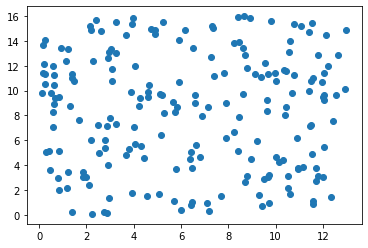

In [5]:
plt.scatter(*pts.transpose())

In [6]:
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

In [7]:
# this is a list of all the points that are the verticies in are diagram
verts[0:5, :]

array([[ 1.26112468,  1.19756794],
       [-7.37522192,  7.1901409 ],
       [ 3.71043872, 11.2687735 ],
       [ 8.57449201,  6.1130908 ],
       [ 2.70084395, -0.84023827]])

In [8]:
# Gives us the indicies into verts for the 10th polygon
shapes_ind[10]

[93, 89, 88, 77, 83, 92]

In [9]:
# gives us the points in R2 that actually form the 10 th polygon
verts[shapes_ind[10]]

array([[1.97306405, 2.75367811],
       [3.10014464, 2.94058251],
       [3.27317585, 2.85180321],
       [3.10035845, 2.37085665],
       [1.93510999, 1.45819992],
       [1.55480389, 2.59333081]])

In [10]:
"""
We are doing three things here
1. filtering out any empty shapes (len(s) == 0)
2. filtering out any shapes that go out of bounds (then it has an index of -1)
3. Closing the polygon by adding the last point back (so [1,2,3]->[1,2,3,1])
"""
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

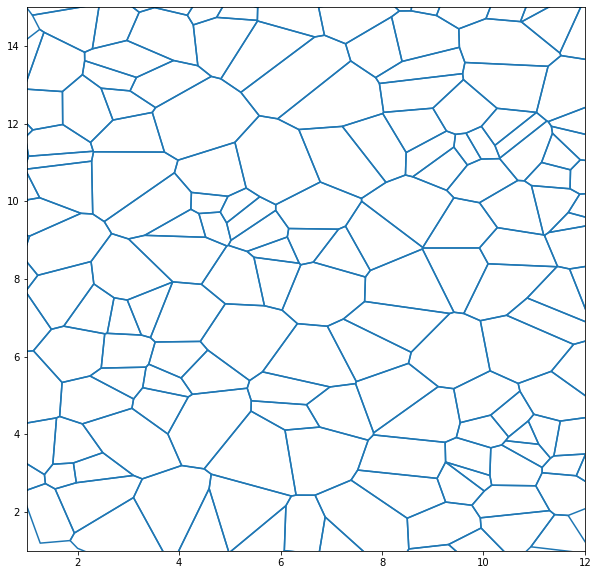

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(shapes)
ax.add_collection(lc)

In [12]:
# let's just look at one polygon

polygon_ind = 15
polygon = shapes[polygon_ind]

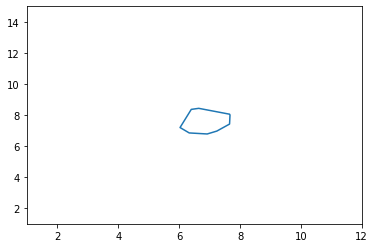

In [13]:
fig, ax = plt.subplots()
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection([polygon])
ax.add_collection(lc)

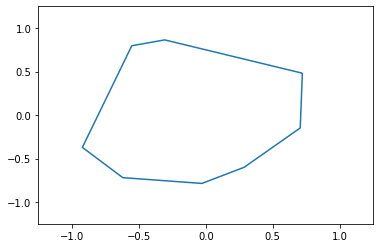

In [14]:
# now we can recenter it
center = np.mean(polygon, axis=0)


fig, ax = plt.subplots()
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection([polygon - center])
ax.add_collection(lc)

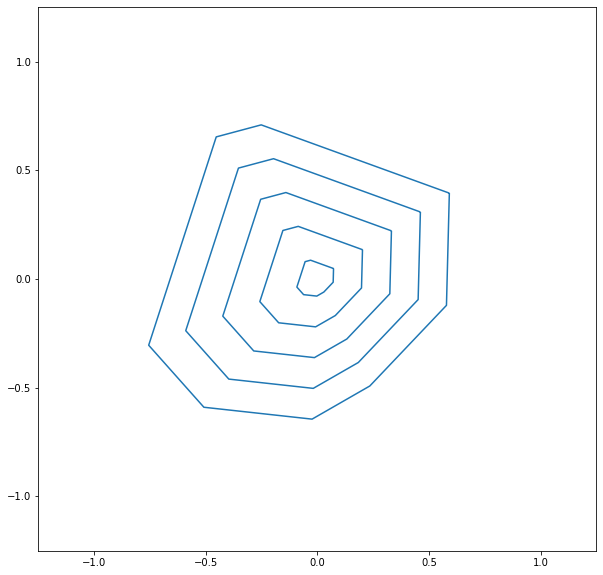

In [15]:
# now we can fill contract it

rescaled = []

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center)
    rescaled.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection(rescaled)
ax.add_collection(lc)

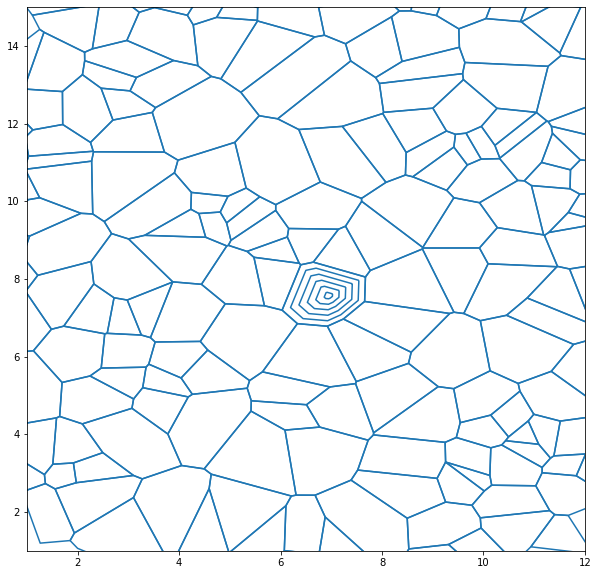

In [16]:
"""
So now we have the fill figured out, and we have to put it back into place!
"""

filled_polygon = shapes

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    filled_polygon.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(*x_plot)
ax.set_ylim(*y_plot)
lc = LineCollection(filled_polygon)
ax.add_collection(lc)